# Aufgabe 1: Einleitung

Die SDIL-Platform ist die leistungsstarke in-memory Computing-Infrastruktur des SDIL, die vom Steinbruch Centre for Computing (SCC) betrieben wird und Software und Hardware auf dem neusten Stand der Technik bietet. Sie bietet eine vielfältige Auswahl an Big Data und in-memory Technologien auf den Platformen von SAP HANA, Software AG Terracotta, Huawei FusionInsight und der IBM Open Platform.

Aufgabenstellung:

- Lesen Sie das Kapitel 10.1 (S. 73) der [SDIL Documentation](http://www.sdil.de/sdil-platform-documentation.pdf) und erstellen Sie die Anaconda Umgebung für Ihr Projekt.  
--> Wir haben wie beschrieben eine Anaconda-Umgebung erstellt.
  
- Lesen Sie das Kapitel 4.2 (S. 22) des [SDIL Tutorials](http://www.sdil.de/sdil-platform-tutorials.pdf).  
  --> Im Folgenden werden die einzelnen Schritte des Tutorials durchgeführt und kommentiert.

## 4.2 Einführung in den Datensatz

In dem Tutorial geht es um den bekannten "Iris Flower Dataset" (deutsch: Schwertlilien-Datensatz), der das Aussehen der Blumen beschreibt und sie in verschiedene Arten einteilt. 

Das Aussehen wird mithilfe der Länge und Breite (gemessen in cm) der Kelchblätter (_sepal_) und Kronblätter (_petal_) beschrieben.  
Die Lilien-Arten sind _setosa_, _versicolor_ und _virginica_.

Die Folgenden Code-Snippets basieren auf dem [SDIL-Iris-Tutorial](https://git.sdil.kit.edu/sdil-tutorials/iris_tutorial/blob/master/iris_tutorial.ipynb).

## 4.2.1 Starten des Jupyter-Notebooks

Folgende Schritte wurden erfolgreich durchgeführt:

- Einloggen
- Erstellen der Python-Umgebung
- Erstellen dieses Notebooks

Um die Dateistruktur des Repositories einheitlich zu halten, wurde das Notebook nicht in `iris_tutorial.ipynb` umbenannt.

Weiterhin wurde vor der Erstellung des Notebooks das GitHub-Repository der Praktikumsgruppe geklont, um eine Versionsverwaltung zu haben.

Zusatz: Um nicht jedes Mal eine Remote-Desktop Verbindung zu SDIL aufbauen zu müssen, wurde mit dem folgenden Befehl eine Möglichkeit gefunden, die Website unter `notebooks.sdil.kit.edu:8000`, die normalerweise nur innerhalb des Remote-Desktops zur Verfügung steht, auch im lokalen Browser unter `localhost:8080` zugänglich zu machen:

    ssh -L localhost:8080:notebooks.sdil.kit.edu:8000 <user>@login-l.sdil.kit.edu

###### Laden der Bibliotheken

Zunächst werden im Tutorial die benötigten Bibliotheken geladen.

In [17]:
# Load libraries
import pandas
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix # scatter_matrix was moved
import matplotlib.pyplot as plt
# from sklearn import cross_validation
from sklearn.model_selection import cross_validate # moved
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# additionally load seaborn (not in the tutorial)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy import stats

## 4.2.2 Laden der Daten

Laden der Daten mithilfe von `pandas` unter Angabe der Spaltennamen.

In [18]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

## Daten-Exploration

Ansehen der Struktur der Daten und der erste Zeilen des Datensatzes.

In [19]:
# shape
print(dataset.shape)

(150, 5)


In [20]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

## 4.2.4 Daten-Visualisierung

Nutzung von Box-Whisker-Plots, Histogrammen und Scatter-Plots für jedes Merkmal zur Datenvisualisierung.
Um die Diagramme größer darzustellen, wurde eine benutzerdefinierte Größe festgelegt.

In [21]:
# Set custom figure Size
plt.rcParams['figure.figsize'] = [7, 7]

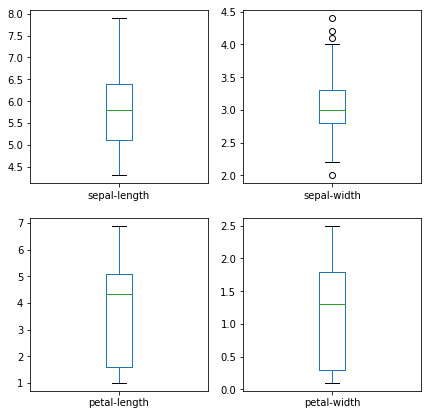

In [22]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

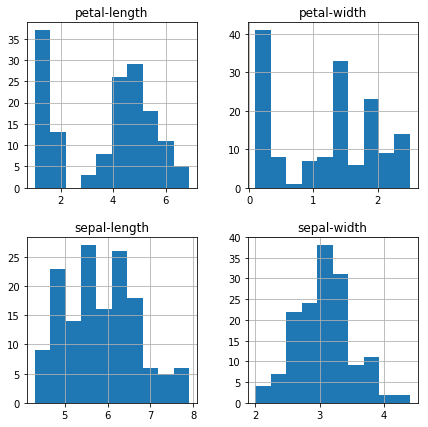

In [23]:
# histograms
dataset.hist()
plt.show()

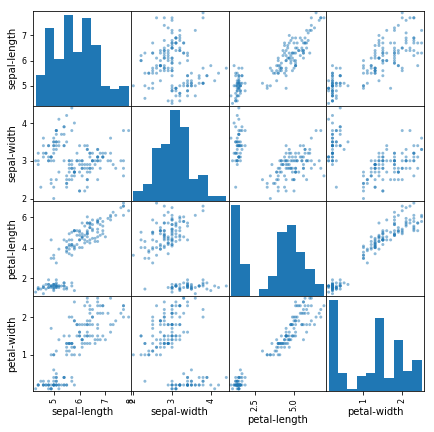

In [24]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

Eine Datenvorverarbeitung ist im Tutorial nicht vorgesehen, aber auch nicht nötig, da es keine akuten Anzeichen für Ausreißer gibt und die Korrelation der Merkmale gering ist.

###### Verteilung der Zielvariable

Im Gegensatz zum Vorgehen im Tutorial soll zusätzlich die Verteilung der Zielvariable betrachtet werden

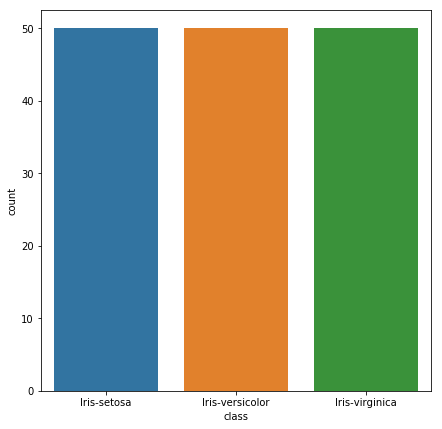

In [25]:
# create a countplot that shows the class distribution
sns.countplot(x='class',data=dataset)

Es handelt sich um einen perfekt balancierten Datensatz, weil alle Klassen gleich oft in den Daten vorhanden sind.

## 4.2.5 Algorithmen-Evaluation

Die Algorithmen Evaluation gliedert sich in mehrere Schritte:

###### 1. Aufteilen des Datensatzes in Trainings- und Testdaten

Für das Aufteilen wird das Verhältnis von Trainings- und Testdaten auf 80:20 gesetzt. Zudem wird zur Reproduktion der Ergebnisse der Random-Seed auf 7 gesetzt.

In [26]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
test_size = 0.20
seed = 7
# X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=test_size, random_state=seed)

###### 2. Vorbereiten der Metrik

Im späteren Verlauf soll 10-Fold-Cross-Validation verwendet werden. Dabei wird der Trainings-Datensatz zufällig in 10 Teile aufgeteilt, wobei anschließend 9 von diesen Teilen zum Training und der übrige Teil zum Testen benutzt wird. Dieser Vorgang wird 10 Mal für verschiedene zufällige Aufteilungen des Datensatzes durchgeführt.

In jedem Schritt wird der Test-Teil der Daten benutzt, um eine Metrik für das trainierte Modell zu berechnen. Am Ende kann beispielsweise der Durchschnitt der Werte für diese Metrik berechnet werden.

**Antwort zu Aufgabe 1a: Warum ist accuracy eine geeignete Metrik für diese Klassifikationsaufgabe?**

In diesem Tutorial wird als Metrik die sogenannte _Accuracy_ benutzt (deutsch: Trefferquote). Die ist eine geeignete Metrik für die vorliegende Klassifikationsaufgabe, weil es sich um eine Klassifikationsaufgabe für einen perfekt balancierten Datensatz handelt.

In [27]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

###### 3. Erstellen verschiedener Modelle und Evaluation

Es werden verschiedene Modelle zur Evaluation erstellt:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN)
- Classification and Regression Trees (CART) • Gaussian Naive Bayes (NB)
- Support Vector Machines (SVM)

In [28]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Hierbei handelt es sich um eine Mischung aus einfachen linearen (`LR` und `LDA`) und nichtlinearen (`KNN`, `CART`, `NB`, `SVM`) Algorithmen.

###### 4. Training und Evaluation der Modelle

In der anschließenden Zelle wird jedes Modell 10-fach kreuzvalidiert und die Ergebnisse für jedes Modell in der Liste `results` gespeichtert.

In [29]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    #cv_results=cross_validate.cross_val_score(model, X_train, Y_train, cv=10, scoring=scoring)
    cv_results=cross_val_score(model, X_train, Y_train, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{:5s} {:1.4f} ({:1.4f})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR    0.9673 (0.0401)
LDA   0.9749 (0.0385)
KNN   0.9817 (0.0369)
CART  0.9826 (0.0349)
NB    0.9666 (0.0411)
SVM   0.9917 (0.0250)


*Erkenntnis*: `SVM` hat mit 0.99 die höchste Accuracy. Danach folgt `KNN` mit 0.98.

*Bemerkung*: Im Tutorial hat sich an dieser Stelle ein Fehler eingeschlichen. Obwohl im enthaltenen Screenshot die gleichen Ergebnisse zu sehen sind wie hier, finden sich im Text andere Werte. Aus diesen geht hervor, dass `KNN` die höchste Accuracy hat (und nicht `SVM`).

###### 5. Vergleich der Algorithmen

In den folgenden Zellen sehen wir uns die Ergebnisse genauer an.

In [35]:
# Show the results list
accuracies = pandas.DataFrame(results, index=names)
display(accuracies)

,0,1,2,3,4,5,6,7,8,9
LR,1.0,1.0,0.923077,1.0,1.0,0.916667,0.916667,0.916667,1.000000,1.0
LDA,1.0,1.0,0.923077,1.0,1.0,0.916667,1.000000,1.000000,0.909091,1.0
KNN,1.0,1.0,1.000000,1.0,1.0,0.916667,1.000000,1.000000,1.000000,0.9
CART,1.0,1.0,1.000000,1.0,1.0,0.916667,1.000000,1.000000,0.909091,1.0
NB,1.0,1.0,0.923077,1.0,1.0,0.916667,1.000000,0.916667,0.909091,1.0
SVM,1.0,1.0,1.000000,1.0,1.0,0.916667,1.000000,1.000000,1.000000,1.0


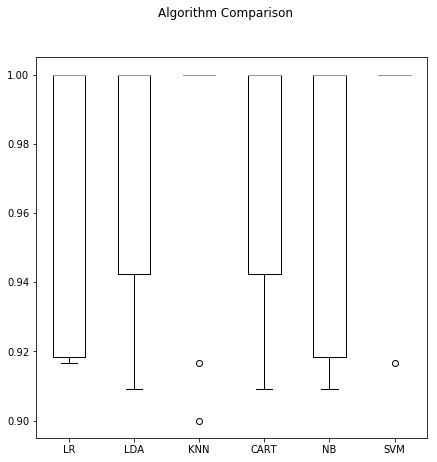

In [18]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Es ist zu erkennen, dass KNN und SVM die Daten sehr häufig exakt trennen können.

## Vorhersagen auf dem Test-Datensatz

Im folgenden soll das beste Modell (im Tutorial `KNN`, hier `SVM`) noch mit den Testdaten validiert werden.

In [19]:
# Make predictions on validation dataset
# cls = KNeighborsClassifier()
cls = SVC()
cls.fit(X_train, Y_train)
predictions = cls.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



/home/carmen/anaconda3/envs/python3_5-SmartDataAnalytics/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wir erreichen eine Accuracy von 93%.  
In der Konfusionsmatrix ist zu erkennen, dass 2 Datensätze falsch klassifiziert wurden (Werte außerhalb der Hauptdiagonale).  
Aufgrund dieser falsch klassifizierten Datensätze sind Precision/Recall und damit auch der F1-Score der entsprechenden Klassen kleiner als 1.

## Antwort zu Aufgabe 1b: Stimmen Sie der Aussage des Tutorials zu? 

Abgesehen von dem Fehler, der sich eingeschlichen hat, bekommen wir dieselben Ergebnisse. Augenscheinlich schneidet die SVM am besten ab. Die statistische Signifikanz dessen wird in Teilaufgaben c geprüft und darauf basierend entschieden, ob die SVM auch aus statistischer Sicht am besten abschneidet.

## Antwort zu Aufgabe 1c: Ist ein durchschnittliche _accuracy_ eines Modells statistisch signifikant besser als das von anderen Modellen? 

Zunächst muss die Art des Problems definiert werden. Hier wird nach einem Verfahren zur Untersuchung von Unterschieden von Mittelwerten, also einer zentralen Tendenz, verlangt. Problematisch ist jedoch, dass keine unabhängigen Stichproben vorhanden sind, d.h. die accuracies der einzenlen folds der Klassifikatoren basieren auf derselben Stichprobe. Im Folgenden werde zwei immer Klassifikatoren gegeneinander getestet. Laut https://www.methodenberatung.uzh.ch/de/datenanalyse_spss/unterschiede/zentral.html muss nun entschieden werden, ob die Variablen normal-, ordinal- oder intervallskalliert sind und ob die Normalverteilungsannahme gültig ist. Bei der Accuracy trifft die Voraussetzung "mindestens intervallskaliert" zu. Der t-Test für verbundene Stichprobe fordert eine Normalverteilung der zugrunde liegenden Variablen. Diese ist für hinreichend große n, also einen hinreichend großen Umfang der Stichprobe, aufgrund des Zentralen Grenzwertsatzes gegeben. Allerdings umfasst die Stichprobe der Accuracies hier 10, sodass nicht von einer Normalverteilung ausgegangen werden kann. Daher entscheiden wir uns für den Wilcoxon-Test, der keine Verteilung fordert. Im Folgednen Link wird der Unterschied zwischen Wilcoxon Signed Rank Test und dem Paired Student’s t-test (t-Test für verbundene Stichproben) erläutert und erklärt, wie der Wilcoxon-Test funktioniert:
https://www.datascienceblog.net/post/statistical_test/signed_wilcox_rank_test/



https://www.methodenberatung.uzh.ch/de/datenanalyse_spss.html

### Test

In [39]:
# get accuracies of different classifiers
accuracies_lr = accuracies.loc['LR',:]
accuracies_lda = accuracies.loc['LDA',:]
accuracies_knn = accuracies.loc['KNN',:]
accuracies_cart = accuracies.loc['CART',:]
accuracies_nb = accuracies.loc['NB',:]
accuracies_svm = accuracies.loc['SVM',:]

Im Folgenden wird die statistische Signifikanz des Unterschieds zwischen dem Klassifikator mit der höchsten Mean Accuracy (SVM) und dem der kleinsten (Logistic Regression) untersucht. Ist dieser Unterschied nicht signifikat, so kann der Unterschied zwischen den beiden Klassifikatoren mit der höchsten Mean Accuracy nicht signifikant sein. Dabei wird mit einem Signifikanzniveau von 0,05 getestet.

In [40]:
# wilcoxon test with svm and lr
stats.wilcoxon(accuracies_lr, accuracies_svm, zero_method="wilcox")

/smartdata/ulegg/.conda/envs/python3_5-SmartDataAnalytics_Ex2/lib/python3.5/site-packages/scipy/stats/morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.10247043485974937)

Es ist zu erkennen, dass der p-Wert bei ca. 0,1024 liegt und damit größer als die geforderten 0,05. Damit kann basieren auf der vorliegenden Stichprobe und einem Signifikanzniveau von 0,05 statistisch nicht bewiese werden, dass die SVM besser als die Logistische Regression ist.
Folgend kann der Aussage des Tutorial nicht zugestimmt werden. Im Folgenden wird gezeigt, dass die SVM basierend auf einem Signifikanzniveau von 0,05 und gemessen anhand der Accuracy nicht besser ist als ein anderer getester Klassifikator.

In [44]:
# wilcoxon test with svm and all other classifiers
print('lda and smv:')
display(stats.wilcoxon(accuracies_lda, accuracies_svm, zero_method="wilcox"))
print('knn and smv:')
display(stats.wilcoxon(accuracies_knn, accuracies_svm, zero_method="wilcox"))
print('cart and smv:')
display(stats.wilcoxon(accuracies_cart, accuracies_svm, zero_method="wilcox"))
print('nb and smv:')
display(stats.wilcoxon(accuracies_nb, accuracies_svm, zero_method="wilcox"))

lda and smv:


/smartdata/ulegg/.conda/envs/python3_5-SmartDataAnalytics_Ex2/lib/python3.5/site-packages/scipy/stats/morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.17971249487899976)

knn and smv:


WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)

cart and smv:


WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)

nb and smv:


WilcoxonResult(statistic=0.0, pvalue=0.10880943004054568)

Im Folgenden wird der t-Test für verbundene Stichproben zum Vergleich durchgeführt, obwohl wir nicht von einer Normalverteilung ausgehen. 

In [54]:
# paired t-test
stats.ttest_rel(accuracies_lr, accuracies_svm)

Ttest_relResult(statistic=-1.9620209138413156, pvalue=0.08137961902196346)

Auch dieser Test würde zu dem Ergebnis kommen, dass die SVM statistisch basierend auf einem Signifikanzniveauz 